# CT: Radon Operator
We start by setting up the Radon Transform operator. We restrict ourselves to parallel geometry for now.

In [25]:
import odl
import numpy as np
import matplotlib.pyplot as plt

Always start by setting up the image space. In the lecture, we used $[-1,1]^2$.

In [26]:
reco_space = odl.uniform_discr(
    min_pt=[-1, -1], max_pt=[1, 1], shape=[300, 300], dtype='float32')

Now set up the tomograph geometry. Note that we need to choose $\sqrt 2$ for the detector length.

Set limited_view to values between 0 and 1 for limited views.

In [31]:
p=180
q=512
L=np.sqrt(2)
limited_view=1
angle_partition = odl.uniform_partition(0, np.pi*limited_view, 180)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-L, L, int(L*q))
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

Now create a phantom and generate data.

In [32]:
phantom = odl.phantom.shepp_logan(reco_space, modified=True)
proj_data = ray_trafo(phantom)

/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/w/wuebbel/.local/lib/python3.10/site-packages/odl/discr/discr_utils.py:628: UserWarning: Unable to infer accurate dtype for interpolation coefficients, defaulting to `float`.
  warn("Unable to infer accurate dtype for"


Perform unfiltered backprojection by applying the $L^2$-adjoint.

In [33]:
backproj = ray_trafo.adjoint(proj_data)

Display results.

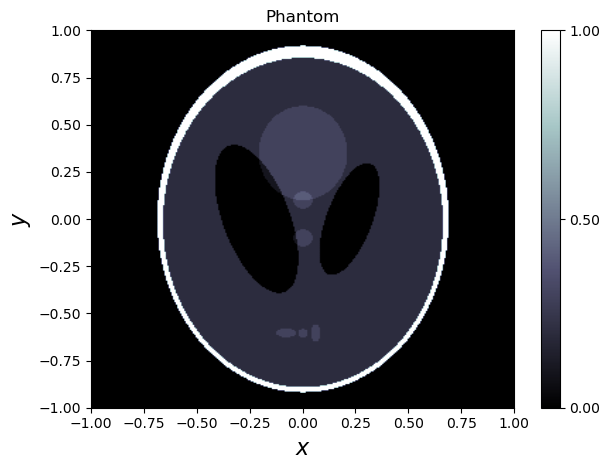

<Figure size 640x480 with 0 Axes>

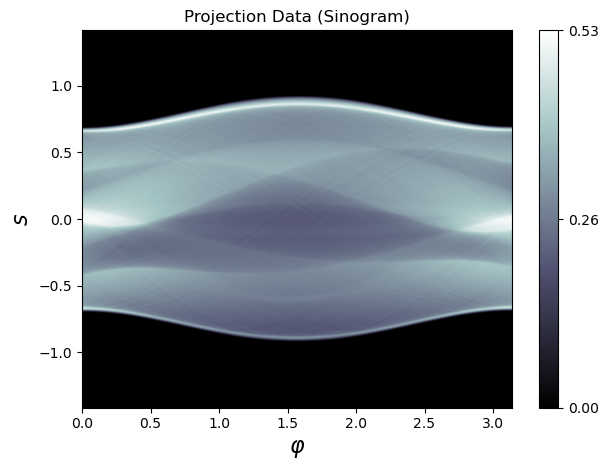

<Figure size 640x480 with 0 Axes>

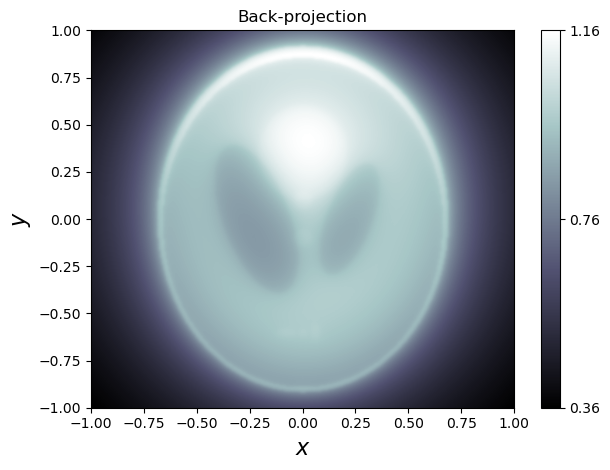

<Figure size 640x480 with 0 Axes>

In [34]:
phantom.show(title='Phantom')
proj_data.show(title='Projection Data (Sinogram)')
backproj.show(title='Back-projection', force_show=True);